# 순환 신경망

## 순차데이터

순차 데이터(Sequential data)란 `텍스트`나 `시계열 데이터(time series data)`와 같이 순서에 의미가 있는 데이터.

* 주의: 데이터의 순서를 기억해 신경망에 주입해야함.  

완전 연결 신경망이나 합성곱 신경망은 이러한 기억 장치가 없다. 

* `피드포워드(FFNN:feedforward)` 신경망: 입력 데이터의 흐름이 앞으로만 전달되는 신경망



## 순환 신경망(RNN: recurrent neural network)

완전 연결 신경망에서 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 순환 신경망이 된다. 뉴런의 출력이 다시 자기 자신에게 전달되어 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용하는 셈.


A,B,C라는 3개의 샘플을 처리하는 순환 신경망 뉴런이 있다고 가정할때  
A를 처리하고 난 출력값 OA는 다음 샘플 B를 처리할때 함께 사용한다.  
그렇게 차례대로 C를 처리할 때 B에 대한 출력값 OB를 사용하는데 이렇게 되면 OC에는 A와 B에 대한 정보가 다 담기게 된다. 


* 타임스텝(timestep): 샘플을 처리하는 한 단계
물론 OC가 A에 대해서 보다 B에 대한 정보를 더 많이 가지고 있다. 이렇게 타임스텝이 오래될수록 순화되는 정보가 희미해진다.

* 셀(cell): 순환 신경망에서 층을 셀이라고 부르며 이 셀에서는 뉴런을 모두 표시하지 않고 셀로 층을 표현한다. 이런 셀의 출력은 `은닉 상태(hidden state)`라고 부른다.

일반적으로 은직층 활성화 함수로 `하이퍼볼릭 탄젠트` 함수를 사용. 이는 시그모이드와 유사하지만 -1~1 사이의 값을 갖는다. (시그모이드의 경우 0~1까지의 범위)

* 순환 신경망의 하이퍼 파라미터: 가중치,절편 그리고 타임스텝의 은닉 상태에 곱해지는 가중치. 셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만든다. 
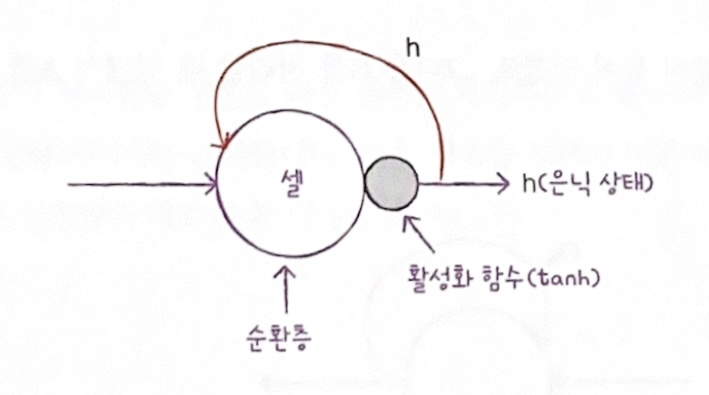

모든 타입스텝에 사용되는 가중치는 하나지만 타임스텝에 따라 변화되는 뉴런의 출력을 해당 가중치가 학습한다.

* 순차 데이터
* 순환 신경망
* 셀
* 은닉상태: 순환 신경망의 출력을 의미. 은닉 상태는 다음 층으로 전달될 뿐만 아니라 셀이 다음 타임스텝의 데이터를 처리할 때 재사용됨.

# 9-2. 순환 신경망으로 IMDB 리뷰 분류하기

두 가지 방법으로 순환 신경망에 주입  

1) 원-핫 인코딩  
2) 단어 임베딩


* NLP: 자연어처리. 음성 인식, 기계 번역, 감성 분석 등이 있음. 훈련 데이터를 말뭉치(corpus)라고 지칭.  

텍스트 자체를 신경망에 전달 x -> 숫자 데이터 형태로 변환하여 주입.  

단어마다 고유한 정수 부여하는 방법이 일반적.(한국어의 경우 공백기준으로 나누기 역부족. 형태소 분석을 통해 토큰을 생성한다)



## IMDB 데이터
영화 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋으로 영어 리뷰로 구성되어 있다. 


In [43]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [44]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input,test_target) = imdb.load_data(
num_words = 300)

In [45]:
# 훈련 세트와 테스트 세트의 크기

print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [46]:
print("첫번째 리뷰의 길이",len(train_input[0]),"개의 토큰으로 구성")

첫번째 리뷰의 길이 218 개의 토큰으로 구성


In [47]:
print("첫번째 리뷰에 담긴 내용")

# 어휘 사전에 500개의 단어를 이용해 정수값으로 매핑
# 사전에 없는 단어는 2로 매핑

print(train_input[0])

첫번째 리뷰에 담긴 내용
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [48]:
print("각 리뷰의 긍부정 판단")
# 0 = 부정/ 1= 긍정
print(train_target[:20])

각 리뷰의 긍부정 판단
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


### 교차검증을 위한 검증 데이터셋 분리

In [49]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

### 훈련 세트 데이터 조사(시각화)

#### 1. 리뷰의 길이 - 넘파이 배열에 담아 길이 시각화

In [50]:
import numpy as np

# 길이를 lengths 배열에 쌓아 데이터 구성
lengths = np.array([len(x) for x in train_input])

In [51]:
# 텍스트 길이의 평균값과 중앙값
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


### 시각화

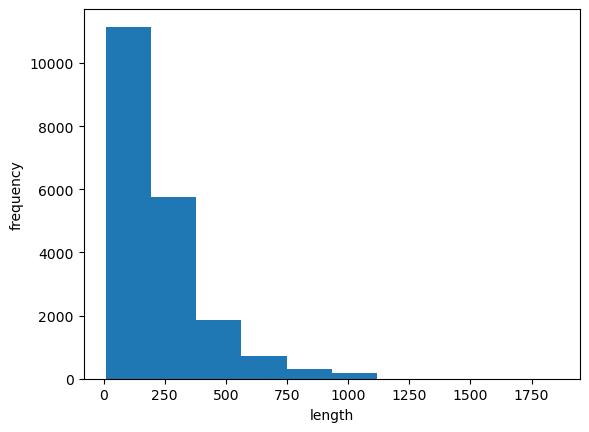

In [52]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

대부분의 리뷰는 300미만. 리뷰는 대부분 짧아 100개 단어만 사용하도록 하겠음. 하지만 사용된 단어가 100개보다 작은 리뷰는 패딩을 사용. 패딩을 나타내는 토큰은 0을 사용. 100보다 길이가 긴 리뷰는 길이 100으로 맞춰주는 케라스 함수 사용

In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [54]:
print(train_seq.shape)

(20000, 100)


In [55]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [56]:
# 잘린 샘플 train_seq[0]의 끝 데이터와 
# 자르기 전 데이터 train_input[0][:-10] 끝 데이터가 일치하는 것을 확인
print(train_input[0][-10:])

# pad_sequences() 함수는 maxlen보다 긴 시퀀스 앞부분을 자른다.

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [57]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

`SimpleRNN` 클래스로 순환 신경망 구축  

리뷰 분류(긍/부정)은 이진 분류이므로 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용  

In [58]:
from tensorflow import keras

model = keras.Sequential()

# input_shape = 입력 차원
# 100인이유 - 100개로 리뷰 길이를 잘랐기 때문에
# 300인 이유 - 사전에서 300개의 단어를 사용하도록 지정-사용된 고유단어가 300개
# 즉 훈련 데이터가 가질 수 있는 정숫값이 0~299까지라서


model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))

# 출력층에 1개의 뉴런. 활성화 함수로 시그모이드 
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 1) 원-핫 인코딩 방법 사용하여 데이터 변환

단어에 매핑된 정수값은 어떠한 관계도 없지만 해당 정수값을 신경망에 입력하면 해당 신경망은 높은 정수값의 데이터를 중요하다고 생각한다. 따라서 이러한 정숫값에 있는 크기 속성을 없애고 정수를 고유하게 표현하는 방법이 필요하다. 이때 사용하는 것이 원-핫 인코딩.

* `keras.utils.to_categorical()` 패키지 아래 함수를 통해 정수 배열 입력시 원-핫 인코딩된 배열을 반환해줌.

In [59]:
train_oh = keras.utils.to_categorical(train_seq)

In [60]:
# 원-핫 인코딩 된 배열의 크기확인
print(train_oh.shape)

(20000, 100, 300)


In [61]:
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [62]:
val_oh = keras.utils.to_categorical(val_seq)

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 2472      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,481
Trainable params: 2,481
Non-trainable params: 0
_________________________________________________________________


전달한 샘플의 크기는 (100,300)이지만 순환층은 마지막 타임스텝의 은닉 상태만 출력. 때문에 출력 크기가 순환층의 뉴런 개수와 동일한 8임. (None,8)  

순환층의 모델 파라미터 개수: 입력 토큰은 300차원의 원-핫 인코딩 배열. 배열은 뉴런 8개와 완전 연결 이므로 300 x 8 = 2400개의 가중치가 있다.  

순환층의 은닉상태는 다른 타임스텝에 사용되기 위해 또 다른 가중치와 곱해짐.  

때문에 이 은닉강태도 순환층 뉴런과 완전히 연결되기 때문에 (은닉 상태의 크기) x (뉴런개수)로 8x 8 = 64개의 가중치가 필요하다.  

마지막으로 뉴런마다 절편이 하나씩 있으므로 모델의 파라미터 개수는 2400 + 64 + 8 = 2472개가 된다.  

## 순환 신경망 훈련하기

* 확습률 = 0.0001 사용 = 1e-4
* 에포크 = 100
* 배치 크기 = 64

In [64]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 53ms/step - loss: 0.7003 - accuracy: 0.5002 - val_loss: 0.6970 - val_accuracy: 0.5058
Epoch 2/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6956 - accuracy: 0.5123 - val_loss: 0.6946 - val_accuracy: 0.5124
Epoch 3/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6917 - accuracy: 0.5282 - val_loss: 0.6909 - val_accuracy: 0.5318
Epoch 4/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6844 - accuracy: 0.5549 - val_loss: 0.6833 - val_accuracy: 0.5690
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6784 - accuracy: 0.5778 - val_loss: 0.6797 - val_accuracy: 0.5770
Epoch 6/100
313/313 [==============================] - 15s 46ms/step - loss: 0.6732 - accuracy: 0.5891 - val_loss: 0.6754 - val_accuracy: 0.5844
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6679 - accuracy: 0.6061 - val_loss: 0.6702 - val_ac

### 훈련 손실과 검증 손실 시각화

적절한 에포크에서 얼리스타핑이 잘 이뤄졌는지 확인

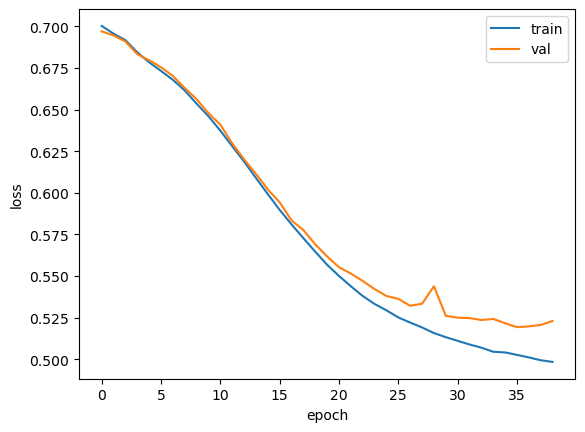

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 원핫 인코딩의 단점

입력 데이터가 엄청 커진다. 원-핫 인코딩 전 train_seq와 인코딩후 train_oh의 크기를 비교해보면 다음을 확인할 수 있다.

In [66]:
print(train_seq.nbytes,train_oh.nbytes)

8000000 2400000000


# 2) 단어 임베딩 사용하여 데이터 변환

* ### `단어 임베딩(word embedding)`  
각 단어를 고정된 크기의 실수 벡터로 바꿔주는 변환 방법이다. 원-핫 인코딩된 벡터보다 의미 있는 값으로 채워지기 때문에 자연어 처리에서 좋은 성능을 내는 경우가 많다. 

`keras.layers.Embedding` 함수를 사용하여 구현가능.  

In [67]:
model2 = keras.Sequential()

# 16은 임베딩 벡터의 크기/input_length는 입력 시퀀스의 길이 
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,009
Trainable params: 5,009
Non-trainable params: 0
_________________________________________________________________


In [68]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 51ms/step - loss: 0.6893 - accuracy: 0.5351 - val_loss: 0.6706 - val_accuracy: 0.5872
Epoch 2/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6399 - accuracy: 0.6467 - val_loss: 0.6234 - val_accuracy: 0.6664
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6051 - accuracy: 0.6941 - val_loss: 0.6003 - val_accuracy: 0.6948
Epoch 4/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5831 - accuracy: 0.7172 - val_loss: 0.5888 - val_accuracy: 0.7026
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5663 - accuracy: 0.7305 - val_loss: 0.5669 - val_accuracy: 0.7300
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5527 - accuracy: 0.7408 - val_loss: 0.5536 - val_accuracy: 0.7356
Epoch 7/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5410 - accuracy: 0.7475 - val_loss: 0.5422 - val_ac

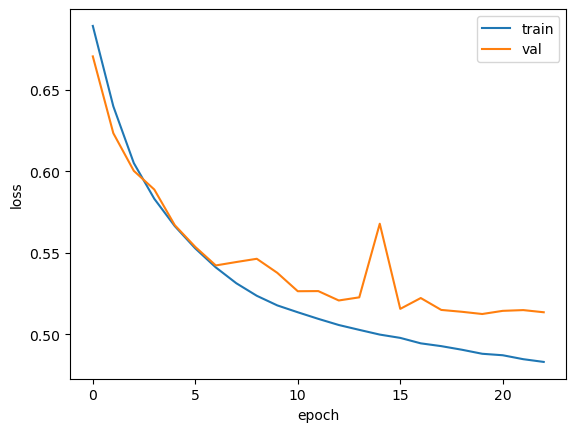

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()